In [1]:
#Set up google colab working environment
%cd ~/../content
%rm -rf Colombian-peso-counterfeit-detection
!git clone https://github.com/zrosen3/Colombian-peso-counterfeit-detection.git 
%cd /content/Colombian-peso-counterfeit-detection/Code  

/content
Cloning into 'Colombian-peso-counterfeit-detection'...
remote: Enumerating objects: 21601, done.
remote: Counting objects: 100% (636/636), done.
remote: Compressing objects: 100% (362/362), done.
remote: Total 21601 (delta 390), reused 468 (delta 270), pack-reused 20965
Receiving objects: 100% (21601/21601), 448.71 MiB | 42.68 MiB/s, done.
Resolving deltas: 100% (484/484), done.
Updating files: 100% (62400/62400), done.
/content/Colombian-peso-counterfeit-detection/Code


In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import common_functions as cf
#import keras_tuner as kt

# from keras import models
# from keras import layers

In [5]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


# CNN

In [6]:
def Reshape5D(time_steps: int = 1, rows: int = 480, cols: int = 640, channels: int = 1):
    def Helper(x, y):
        # Reshape the element to have dimensions (time_steps, rows, cols, channels)
        return tf.reshape(x, [-1, time_steps, rows, cols, channels]), y
    return Helper

In [7]:
def MakeModel(class_names: list) -> tf.keras.Sequential:
    """
    Simple straight forward CNN model. this is just for simplicity and testing
    atm. I will make it more modular later once I know what we are doing

    Args:
        class_names: list of the classification names
        conv_layers: list of how many filters each convolutional layer should use
        layers: list with the sizes of each hidden layer
    
    Returns:
        `tf.keras.Sequential` - a constructed tf model
    """
    tf.keras.backend.clear_session()
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Rescaling(1./255))
    model.add(tf.keras.layers.ConvLSTM2D(16, 3, kernel_regularizer='l2', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(rate=0.4))
    model.add(tf.keras.layers.Dense(len(class_names))) # output

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    return model
    

## Load Data

Found 12479 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.


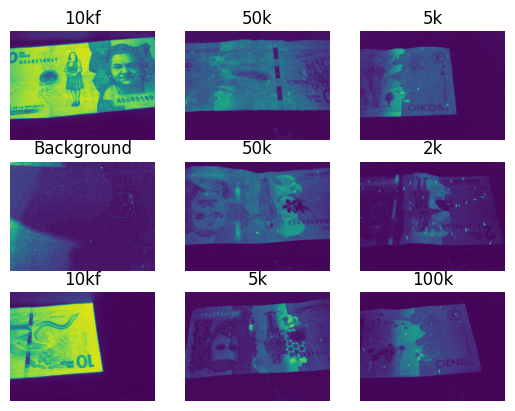

In [8]:
train_ds, test_ds, validation_ds, class_names = cf.LoadData(path="", batch_size=12)
cf.PeakData(train_ds, class_names)

In [9]:
model = MakeModel(class_names)
history = model.fit(
    train_ds.map(Reshape5D()), 
    validation_data=validation_ds.map(Reshape5D()), 
)

1040/1040 [==============================] - 101s 84ms/step - loss: 2.6052 - accuracy: 0.0733 - val_loss: 2.5688 - val_accuracy: 0.0769


# Evaluate

In [ ]:
cf.EvaluateModel(model, test_ds.map(Reshape5D()), history)

130/130 [==============================] - 4s 30ms/step - loss: 0.1522 - accuracy: 0.9596
[test loss, test accuracy]: [0.15219970047473907, 0.9596154093742371]


# Results

grayscale, no augmentation, hyperparameterized = 0.998 searched, 0.995 trained, 0.9957 test